<h1><b>Statistique en Bioinformatique : </b> TME 5 et 6 </h1>
<br>
L’objectif de ce TME est:
<br>
<ul>
<li> implémenter l'algorithme de Viterbi et l'estimation des paramètres (en utilisant le Viterbi training)
pour l'exemple du occasionally dishonest casino.   </li> 
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renomer le fichier TME5_6.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre via moodle </li>
</div>
</div>

Nom etudiant 1 : Sharane K MURALI
<br>
Nom etudiant 2 : Henri GUILHON
<br>

<h3>Introduction</h3>
Un casino parfois malhonnête (occasionally dishonest casino) utilise 2 types de pieces : fair et unfair. <br>
La matrice de transition entre les états cachés est:<br>
${\cal S}=\{F,U\}$ (fair, unfair):
$$
p = \left(
\begin{array}{cc}
0.99 & 0.01\\
0.05 & 0.95
\end{array}
\right)\ ,
$$

les probabilités d'émission des symboles 
${\cal O} = \{H,T\}$ (head, tail):
\begin{eqnarray}
e_F(H) =  0.5 &\ \ \ \ &
e_F(T) = 0.5 \nonumber\\
e_U(H) = 0.9 &\ \ \ \ &
e_U(T) = 0.1 \nonumber
\end{eqnarray}

<br> Et la condition initiale $\pi^{(0)} = (0.999,0.001)$ (le jeux commence presque toujours avec le pieces juste (fair).

<b>Exercice 1</b>:
<u>Simulation</u>: Écrire une fonction qui simule $T$ jets de pièces. 
La fonction renverra un tableau à deux colonnes correspondant 
aux valeurs simulées pour les états cachés $X_t$ 
(type de dés utilisée, “F” ou “U”) et aux symboles observées $Y_t$ 
(résultat du jet de dés, “H” ou “T”). On simulera une séquence
de longueur 2000 qu'on gardera pour les applications ultérieures.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

#states
S = { 0:'F',1 :'U'}

#transition probability matrix
Pij = np.array([[0.99,0.01], [0.05,0.95]])

#emision symbols 
O = {0:'H', 1: 'T'}

#emission probability matrix
Ei = np.array([[0.5,0.5], [0.9,0.1]]) #ça aurait dû être Eio

# initial Condition
pi0=np.array([0.999,0.001])

#number of jets
T = 10000

In [5]:
import random

# Fonction qui simule T jets de pieces
def jets(T, pi0, Eij, Pij):
    """
      simulation of occasionally dishonest casino
      input1 T: number of jets
      input2 pi0: initial condition
      input3 Eij: emission probability matrix
      input4 Pij: transition probability matrix
      output1 jetsRes: matrix |2xT| containing simulations
    """

    # Creation du tableau
    jetsRes = np.zeros((T,len(pi0)),dtype=int)
    
    
    # Initialisation du premier état avec la matrice Pi0
    r = random.random()
    somme_cumulee = np.cumsum(pi0)
    etat = np.where(somme_cumulee>r)[0][0]
    # Premier indice où est tombé le nombre aléatoire dans la somme cumulée
    
    jetsRes[0,0] = etat
    
    # Initialisation de la première émission
    r = random.random()
    somme_cumulee = np.cumsum( Eij[:,etat] )
    emission = np.where(somme_cumulee>r)[0][0]
    jetsRes[0,1] = emission
    
    # Itération de longueur T-1 à partir du premier état initialisé
    for i in range(1, T):
        r = random.random()
        probas_transition = Pij[ jetsRes[i-1,0], : ]
        somme_cumulee     = np.cumsum( probas_transition )
        etat_i            = np.where(somme_cumulee>r)[0][0]
        
        r = random.random()
        probas_emission   = Eij[etat_i, :]
        somme_cumulee     = np.cumsum(probas_emission)
        emission_i        = np.where(somme_cumulee>r)[0][0]
        
        jetsRes[i][0] = etat_i
        jetsRes[i][1] = emission_i
   
    return jetsRes

def printSimulation(resultat):
    for i in resultat : 
        print (S[i[0]], O[i[1]])

jetsRes = jets(T, pi0, Ei, Pij)
printSimulation(jetsRes)

F H
F T
F H
F T
F H
F H
F T
F H
F T
F H
F H
F T
F H
F H
F H
F T
F T
F H
F T
F H
F T
F H
F H
F H
F H
F T
F H
F H
F T
F T
F H
F H
F T
F T
F H
F H
F H
F H
F T
F T
F T
F H
F H
F H
F H
F T
F H
F H
F T
F T
F H
F T
F T
F T
F H
F T
F T
F H
F T
F T
F H
F T
F T
F H
F H
F T
F H
F T
F T
F T
F H
F T
F T
F H
F H
F T
F T
F H
F H
F T
F T
F T
F H
F T
F T
F T
F H
F H
F T
F H
F H
F T
F H
F T
F T
F H
F H
F T
F T
F T
F T
F H
F H
F T
F T
F T
F H
F T
F T
F T
F T
F H
F T
F T
F H
F T
F T
F H
F T
F T
F T
F H
F T
F H
F H
F H
F H
F T
F T
F T
F T
F T
F T
F T
F H
F T
F H
F T
F T
F H
F T
F H
F H
F H
F T
F T
F T
F H
F T
F H
F T
F T
F H
F T
F T
F T
F H
F H
F T
F H
F T
F H
F T
F T
F T
F H
F T
F H
F H
F T
F T
F H
F T
F T
F H
F T
F T
F H
F T
F H
F H
F T
F H
F H
F H
F H
F T
F T
F T
F T
F H
F T
F H
F H
F T
F H
F H
F T
F H
F H
F H
F T
F H
F T
F H
F H
F H
U H
U H
U H
U H
U H
U H
U H
U H
U H
U H
U T
U T
U H
U H
F T
F H
F H
F T
F H
F H
F T
F T
F H
F H
F T
F H
F T
F H
F T
F H
F H
F H
F H
F H
F H
F T
F H
F H
F T
F H
F T
F H
F T


<b>Exercice 2</b>: <u>Algorithme de Viterbi </u>: Écrire une fonction qui permet
de déterminer la séquence $(i^\star_t)_{t=0:T}$ d'états cachés
plus probable, ainsi que sa probabilité. Pour tester votre fonction utiliser le résultat de la 
simulation (2éme colonne) de la question 1. Comparer $(i^\star_t)_{t=0:T}$ avec
les vrais états cachés (1ère colonne de la simulation).


In [7]:
# Algorithme de Viterbi
import operator
from math import log


def viterbi(jets, Pij, Ei, pi0, nS, nO, enLog):
    """
    Implement Viterbi algorithm
    input1 jets: matrix |2xT| containing simulations
    input4 Pij: transition probability matrix
    input3 Ei: emission probability matrix
    input4 pi0: initial condition
    input5 nS: number of different states
    input6 nO: number of different observations
    input7 enLog: bool, when True we apply log to avoid underflow
    output1 i_star: most problable path
    output2 prob: probability associated to the most problable path
    """
    obs   = jets[:,1]
    #Nombre d'observations (longueur des observations)
    T = len(obs) 
    
    # Initialisation des matrices
    i_star = np.zeros((T))
    prob = 1
    delta = np.zeros((T, nS))
    # Initialisation de la probabilité des premières émissions
    delta[0,:] = 1
    
    
    for t in range(1, T):
        if enLog:
            valeurs = delta[t-1,:] + np.log(Pij.T) # transpose Pij for efficient use of einsum
            ViXi = np.log(Ei[:,obs[t]]) + np.max(valeurs, axis=1)
        else:
            valeurs = delta[t-1,:].reshape((1,nS)) * Pij
            ViXi = Ei[:,obs[t]].reshape((nS,1)) * np.max(valeurs, axis=0)
        delta[t,:] = ViXi
                
    # Vraisemblance maximale pour le dernier état
    i_star[-1] = np.argmax(delta[-1,:])
    
    # On fait ensuite le TraceBack sur les états à partir du dernier
    for t in range(T-1, 0, -1):
        if enLog:
            i_star[t-1] = np.argmax( [ delta[t-1,i] + np.log(Pij[i,int(i_star[t])]) for i in range(nS)] )
        else:
            i_star[t-1] = np.argmax( [ delta[t-1,i] * Pij[i, int(i_star[t])]  for i in range(nS) ] )
            
    prob = np.sum( [delta[t, int(i_star[t])] for t in range(T)] )

    return i_star, prob


def analyseResultats(jets, estimation):    
    """
    Compare expected and obtained paths
    input1 jets: expected path
    input2 estimation: obtained path
    output1 error: percentage error
    """
    etats = jets[:,0]
    return 100*np.sum(etats!=estimation)/len(etats)

i_est, P_est = viterbi(jetsRes, Pij, Ei, pi0, 2, 2, True)

print('PROB:', P_est)
print('Nb_0_estimé/Réels', list(i_est).count(0), list(jetsRes[:,0]).count(0))
print('Nb_1_estimé/Réels', list(i_est).count(1), list(jetsRes[:,0]).count(1))

error = analyseResultats(jetsRes, i_est)
print('erreur d\'estimation de viterbi:')
print(error,'%')
#print('Probabilité estimé:')
#print(p_est)

PROB: -33796004.427035265
Nb_0_estimé/Réels 8662 8358
Nb_1_estimé/Réels 1338 1642
erreur d'estimation de viterbi:
6.56 %


<b>Exercice 3</b>: <u>Estimation des paramètres</u>
<br>
3.1) Écrire une fonction qu'utilise tous les résultats de la simulation
(états et symboles) pour compter les nombres d'occurrence $N_{ij}$ est $M_{iO}$ définis en cours. Estimer $P_{ij}$ est $E_i(O)$. Attention, pour éviter les probabilités à zéro nous allons utiliser les pseudo-count.

In [10]:
# Estimation de Parametres par contage

def nombresOccurrence(jets, nS, nO):
    """
    Parameter estimation
    input1 jets: matrix |2xT| containing data
    input2 nS  : number of states
    input3 nO  : number of observations
    output1 Nij: transition probability matrix
    output2 Mio: emission probability matrix
    output3 pi0: initial condition 
    """
    jets = jets.astype(int)
    # On initialise chaque matrice avec des 1 pour éviter d'avoir des valeurs de transition ou d'émission
    # nulles résultant en des erreurs lors du passage au log.
    
    # jets[:,0] : Première colonne = jets
    # jets[:,1] : Seconde  colonne = observations
    
    # Somme des transitions d'états
    Nij = np.ones((nS,nS)) #pseudo-count = 1
    for i in range(1,len(jets[:,0])):
        Nij[ jets[:,0][i-1], jets[:,0][i] ] += 1
    # Normalisation
    Nij /= np.sum(Nij, axis=1).reshape(nS,1)
        
    # Somme des émissions à partir des états
    Mio = np.ones((nS,nO))  #pseudo-count = 1
    for i in range(len(jets[:,0])):
        Mio[ jets[:,0][i], jets[:,1][i] ] += 1
    # Normalisation
    Mio /= np.sum(Mio, axis=1).reshape(nS,1)
    
    # Etat de départ
    pi0 = np.ones((nS))     
    pi0[ jets[:,0][0] ] += 1
    # Normalisation
    pi0 /= np.sum(pi0)
    
    return Nij , Mio , pi0


Nij, Mio, pi0 = nombresOccurrence(jetsRes, 2, 2)

print('Pij estimé:')
print(Nij)
print('\nEio estimé:')
print(Mio)
print('\npi0 estimé:')
print(pi0)

Pij estimé:
[[0.98995095 0.01004905]
 [0.05109489 0.94890511]]

Eio estimé:
[[0.50466507 0.49533493]
 [0.89902676 0.10097324]]

pi0 estimé:
[0.66666667 0.33333333]


3.2) <u> Viterbi training </u>: Écrire une fonction qui utilise
seulement la séquence $(O_t)_{t=0:T}$ (2emme colonne de la simulation) pour estimer les
paramètres $P_{ij}$ est $Ei(O)$. On s’arrêtera quand les différences entre les logVraissamblance est inférieur à 1e-04. Comparer les résultats de 3.1 et de 3.2 (3.2 avec plusieurs restarts,
et avec initialisation des paramètres aléatoire).


In [12]:
import matplotlib.pyplot as plt

# Initialisation aleatoire de Pij, Eij, pi0


def InititRandom(nS, nO):
    """
    randomly initialisations 
    input1 nS: number of states
    input2 nO: number of observations
    output1 Pij_init: transition probability matrix
    output2 Ei_init: emission probability matrix
    output3 pi0_init: initial condition 
    """
    random.seed(10)
    
    # Initialisation matrice de transition d'états
    Pij_init  = np.random.rand(nS,nS)
    Pij_init /= np.sum(Pij_init, axis=1).reshape(nS,1)
    
    # Initialisation matrice d'émission
    Ei_init  = np.random.rand(nS,nO)
    Ei_init /= np.sum(Ei_init, axis=1).reshape(nS,1) 
    
    # Initialisation matrice Pi0
    pi0_init  = np.random.rand((nS))
    pi0_init /= np.sum(pi0_init)

    return Pij_init, Ei_init, pi0_init

# Calcul log Vraisemblance
def logLikelhihood(Pij, Ei, pi0, jets):
    """
    compute Log Likelihood 
    input1 Pij : transition probability matrix
    input2 Ei  : emission probability matrix
    input3 pi0 : initial condition 
    input4 jets: matrix |2xT| containing data
    """
    jets = jets.astype(int)  # évite les pb de float
    
    # Extraction des colonnes
    etat_seq = jets[:,0]
    obs_seq = jets[:,1]
    
    #Nombre d'observations (longueur des observations)
    T = len(obs_seq)
    
    # Initialisation du Log de vraisemblance avec le premier état donné par pi0
    lLikelihood = np.log(pi0[etat_seq[0]])
    
    # Somme des log de vraisemblance sur les transitions états
    lLikelihood += np.sum([ np.log( Pij[ etat_seq[i-1], etat_seq[i] ] ) for i in range(1,T)])
    
    # Somme des log de vraisemblance sur les émissions
    lLikelihood += np.sum([ np.log( Ei [ etat_seq[i], obs_seq[i] ] )    for i in range(T)  ])

    return lLikelihood

def Training(jets, nS, nO):
    """
    Viterbi Training
    input1 jets: matrix |2xT| containing data
    input2 nS: number of states
    input3 nO: number of observations
    output1 Pij_est: transition probability matrix
    output2 Ei_est: emission probability matrix
    output3 pi0_est: initial condition 
    output4 lLikelihood: log Likelihood
    """
    jets_est     = np.array(jets)
    
    # Extraction de la seconde colonne
    observations = jets_est[:,1]
    
    # Initialisation des Matrices Pij, Ei, Pi0 aléatoires
    Pij_est, Ei_est, pi0_est = InititRandom(nS, nO)
    
    # Initialisation des paramètres
    nIteration  = 10000
    criterion   = 1e-04
    lLikelihood = np.zeros((nIteration))
    
    i = -1
    # Conditions d'arrêt :
    #      - Nombre d'itérations maximum atteint i=nIteration
    #      - Différence du log de vraisemblance plus petit qu'un certain epsilon entre deux itérations
    while i==-1 or (np.abs(lLikelihood[i]-lLikelihood[i-1])>criterion and i<nIteration-1):
        
        # Calcul des états les plus probables avec l'algorithme de Viterbi avec les Matrices Pij, Ei, Pi0 itérées
        i_star, prob = viterbi(jets_est, Pij_est, Ei_est, pi0_est, 2, 2, True)   

        # Ré-estimation des matrices Pij, Ei, Pi0 et mises à jour pour l'itération suivante 
        Pij_est, Ei_est, pi0_est = nombresOccurrence(np.array([i_star,observations]).T , 2, 2)
        
        # Mise à jour du log de vraisemblance
        lLikelihood[i+1] = logLikelhihood(Pij_est, Ei_est, pi0_est, np.array([i_star,observations]).T)
        i += 1

    return Pij_est, Ei_est, pi0_est, lLikelihood, i
    
#imprimer les Parametres du Viterbi Training
Pij_est, Ei_est, pi0_est, lLikelihood, itCount = Training(jetsRes, 2, 2)


print('Le modèle est convergé après ' +str(itCount+1)+ ' itérations.')
print('\nPij estimée:')
print(Pij_est)
print('\nEij estimée:')
print(Ei_est)

Le modèle est convergé après 8 itérations.

Pij estimée:
[[0.97709251 0.02290749]
 [0.00293189 0.99706811]]

Eij estimée:
[[0.92511013 0.07488987]
 [0.52395986 0.47604014]]


Text(0.5, 1.0, 'Evolution du Log de Vraisemblance \n au cours des itérations')

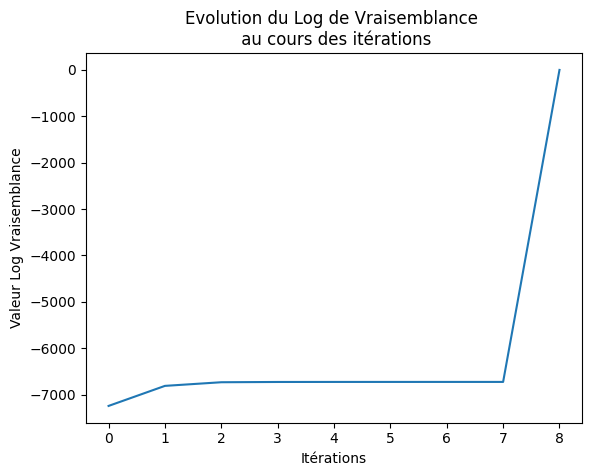

In [17]:
last_index = np.where(lLikelihood==0)[0][0]
plt.plot(np.arange(len(lLikelihood[:last_index+1])), lLikelihood[:last_index+1])
plt.xlabel('Itérations')
plt.ylabel('Valeur Log Vraisemblance')
plt.title('Evolution du Log de Vraisemblance \n au cours des itérations')

[[0.99 0.01]
 [0.05 0.95]]

[[0.97709251 0.02290749]
 [0.00293189 0.99706811]]

[[0.01290749 0.01290749]
 [0.04706811 0.04706811]]


Text(0.5, 1.0, 'Ecarts entre valeurs Estimées et Réelles\nde la matrice PIJ')

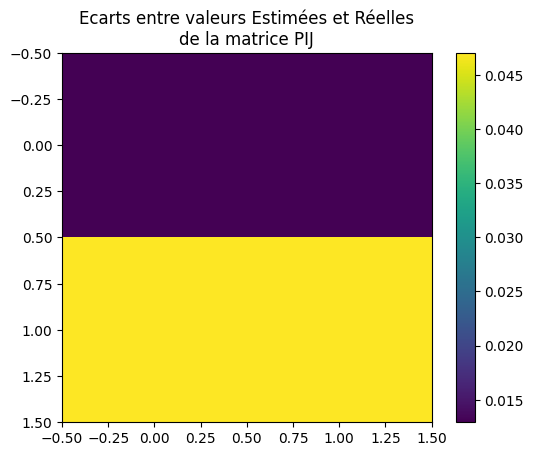

In [20]:
Pij_diff = np.abs(Pij_est-Pij)
plt.imshow(Pij_diff)
print(Pij)
print()
print(Pij_est)
print()
print(Pij_diff)

plt.colorbar()
plt.title('Ecarts entre valeurs Estimées et Réelles\nde la matrice PIJ')

[[0.5 0.5]
 [0.9 0.1]]

[[0.92511013 0.07488987]
 [0.52395986 0.47604014]]

[[0.42511013 0.42511013]
 [0.37604014 0.37604014]]


Text(0.5, 1.0, 'Ecarts entre valeurs Estimées et Réelles\nde la matrice Ei')

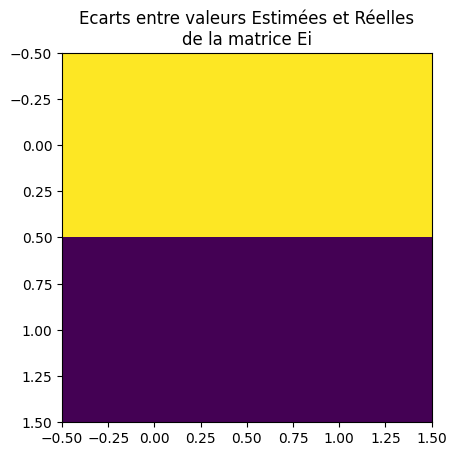

In [21]:
Ei_diff  = np.abs(Ei_est-Ei)
plt.imshow(Ei_diff)
print(Ei)
print()
print(Ei_est)
print()
print(Ei_diff)
plt.title('Ecarts entre valeurs Estimées et Réelles\nde la matrice Ei')

In [54]:
pi0_diff = np.abs(pi0_est-pi0)
print('PI0 originelle:\t',pi0)
print()
print('PI0 estimée:\t',pi0_est)
print()
print('PI0 différence:\t',pi0_diff)

PI0 originelle:	 [0.66666667 0.33333333]

PI0 estimée:	 [0.33333333 0.66666667]

PI0 différence:	 [0.33333333 0.33333333]


Mauvaises estimations dans toutes les matrices

<font color="blue">
Remark: convergence rapide, mais résultat souvent éloigné des matrices de départ, ici une bonne convergence est tout de même observée.
</font>

3.3) <u>Viterbi training deuxième version</u>. 
<BR>Écrivez une version de 3.2 qui:
- part plusieurs fois (100x) d'une initialisation aléatoire desparamètres de l'HMM,
- utilise Viterbi training pour estimer les paramètres,
- calcul la log-vraisemblance pour les paramètres estimés,
- sauvegarde seulement l'estimation avec la valeur maximale de lalog-vraisemblance.

Qu'est-ce que vous observez?



In [22]:
# Viterbi Training  deuxiemme version

def TrainingV2(jets, nS, nO, nIterat=100):
    """
    Viterbi Training version 2.0
    input1 jets: matrix |2xT| containing data
    input2 nS: number of states
    input3 nO: number of observations
    input4 nIterat: number of iterations
    output1 Pij_best: best transition probability matrix
    output2 Ei_best: best emission probability matrix
    output3 pi0_best: best initial condition 
    output4 lLikelihood_best: best log Likelihood
    """
    
    # Initialisation des matrices
    Pij_best = []
    Ei_best = []
    pi0_best = []
    
    # Initialisation de la valeur initiale du log de vraisemblance
    lLikelihood_best = -10000
    
    # N itérations de l'algorithme Training, donc N initialisation aléatoires
    for i in range(nIterat):
        # Une initialisation aléatoire avec ses matrices convergées et sa log de vraisemblance associée
        Pij_est, Ei_est, pi0_est, lLikelihood, itCount = Training(jetsRes, 2, 2)
        
        # Dernier index dont la valeur de vraisemblance est non nulle 
        last_index = np.where(lLikelihood!=0)[0][-1]
        
        # Dans le cas où l'itération i produit un jeu de matrices dont le log de vraisemblance est supérieur
        # au maximum jusqu'ici, alors on met à jour les matrices avec ce nouveau jeu plus probable
        if lLikelihood[last_index] > lLikelihood_best:
            lLikelihood_best = lLikelihood[last_index]
            Pij_best         = Pij_est
            Ei_best          = Ei_est
            pi0_best         = pi0_est
            
    return Pij_best, Ei_best, pi0_best, lLikelihood_best
    

# Imprimer les Parametres du Viterbi Training deuxiemme version
nIterat = 100
Pij_best, Ei_best, pi0_best, lLikelihood_best = TrainingV2(jetsRes, 2, 2, nIterat)

print('Meilleur Pij estimée:');
print(Pij_best)
print('\nMeilleur Eij estimée:')
print(Ei_best)

Meilleur Pij estimée:
[[0.99706811 0.00293189]
 [0.02290749 0.97709251]]

Meilleur Eij estimée:
[[0.52395986 0.47604014]
 [0.92511013 0.07488987]]


<font color="blue">
Remark: les résultats ne sont pas parfaitements identiques mais très proches des données initiales
</font>

In [24]:
print('Valeur du meilleur log de vraisemblance:', lLikelihood_best)

Valeur du meilleur log de vraisemblance: -6727.560649939955
